In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Load the csv of supermarket sales data
sales = pd.read_csv('supermarket_sales.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
# Count the number of null values in each column
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [3]:
# Show the data types of each column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
# Create a subset of the numerical value columns in the dataframe
numeric_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

# Obtain the descriptive statistics for the supermarket sales dataframe
sales[numeric_features].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


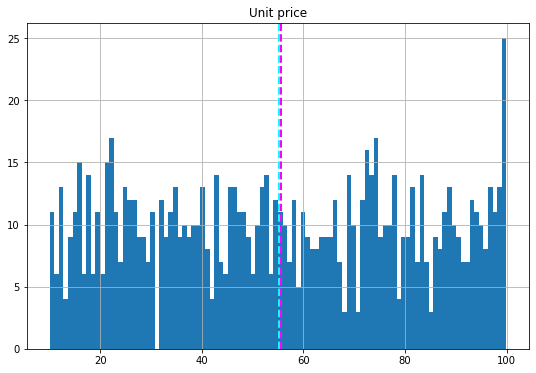

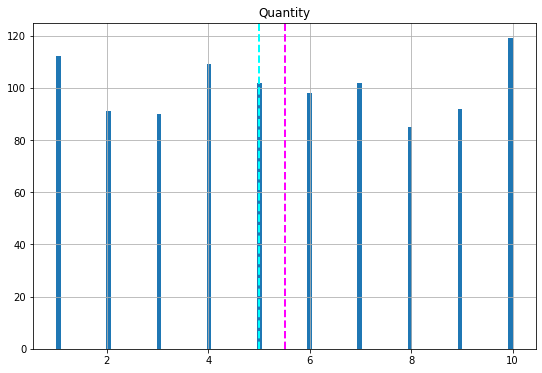

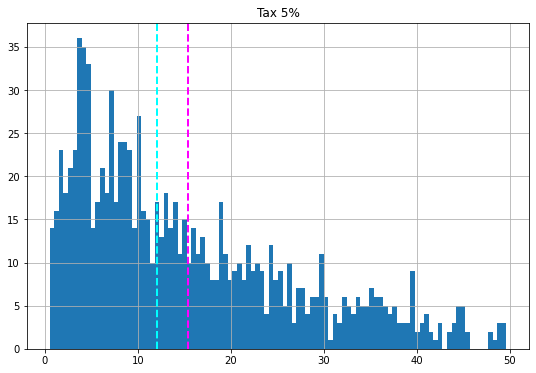

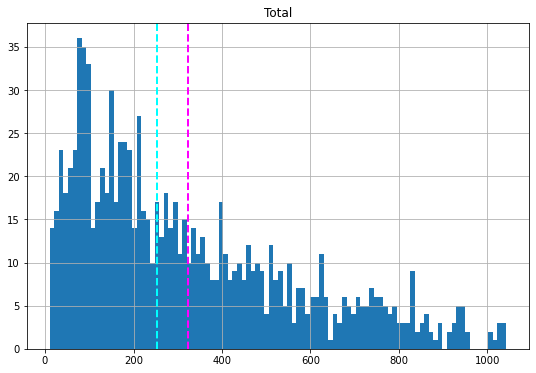

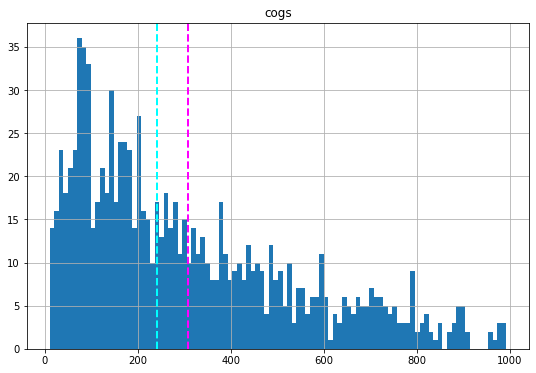

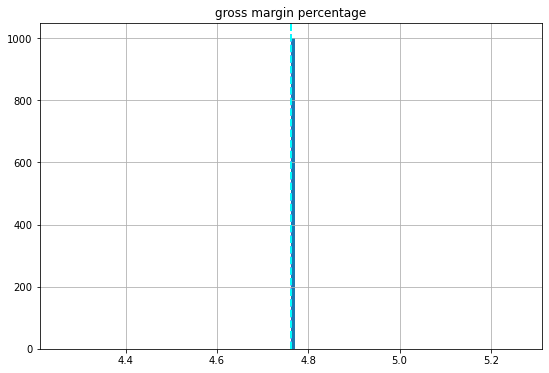

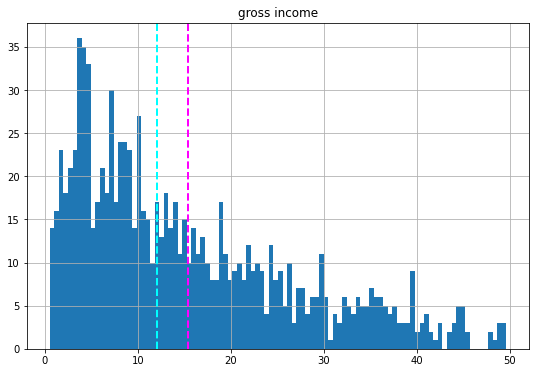

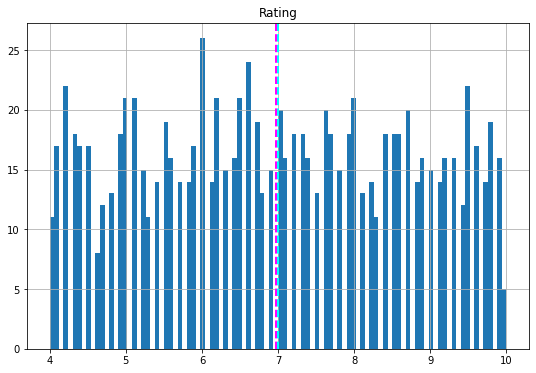

In [5]:
# Loop that plots a histogram for each numeric feature with the mean and median highlighted
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = sales[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

C:\Users\jakee\AppData\Local\Temp/ipykernel_24460/970542718.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jakee\AppData\Local\Temp/ipykernel_24460/970542718.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jakee\AppData\Local\Temp/ipykernel_24460/970542718.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jakee\AppData\Local\Temp/ipykernel_24460/970542718.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jakee\AppData\Local\Temp/ipykernel_24460/970542718.py:9: UserWarning: Matplotlib is currently using module://ma

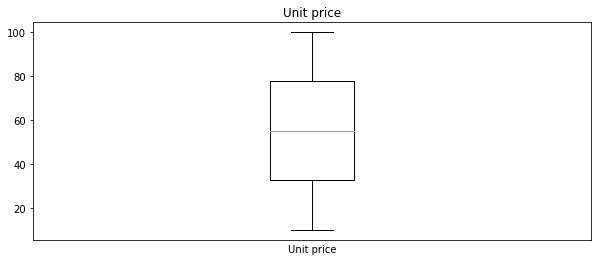

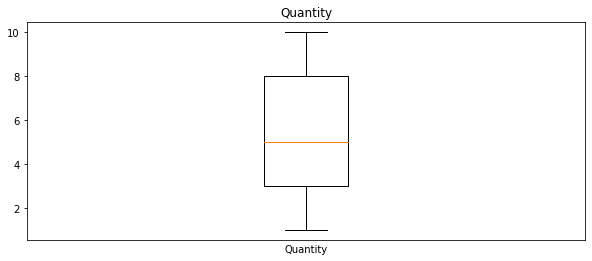

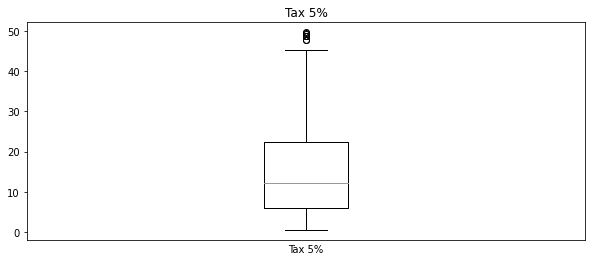

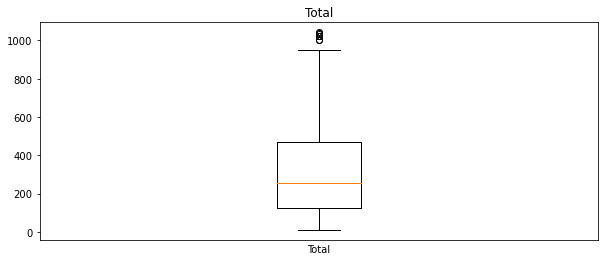

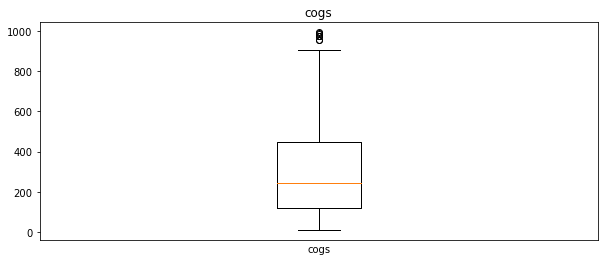

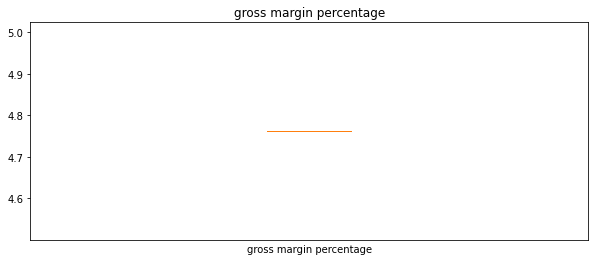

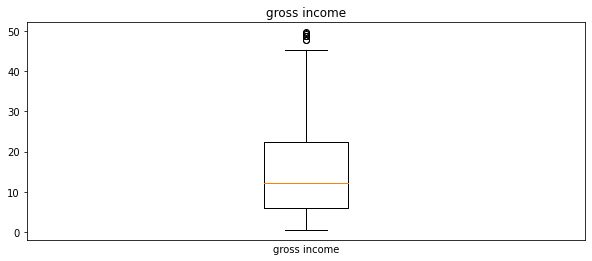

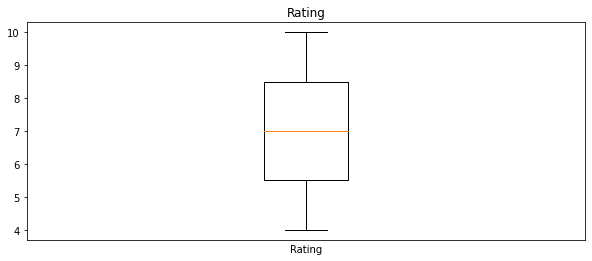

In [27]:
# Loop to plot a boxplot for each numerical column
for col in numeric_features:
    
    fig = plt.figure(figsize=(10,4))
    plt.boxplot(sales[col])
    plt.title(col)
    plt.xticks([])
    fig.show()

In [7]:
# Calculate outlier values of total sales

# Sets the 25th and 75th quantiles of total spend data
Q1 = sales['Total'].quantile(0.25)
Q3 = sales['Total'].quantile(0.75)

# Calculates the interquantile range
threshold = 1.5
IQR = Q3 - Q1

# Creates a subset of the outlier rows
outliers = sales[(sales['Total'] < Q1 - threshold * IQR) | (sales['Total'] > Q3 + threshold * IQR)]

outliers

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8


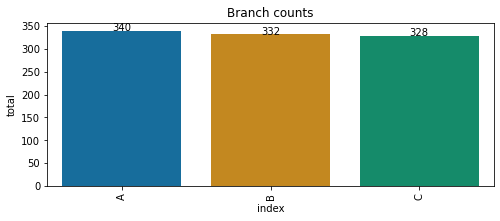

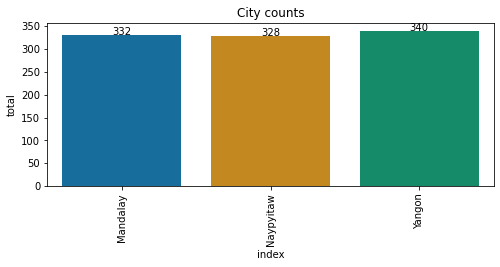

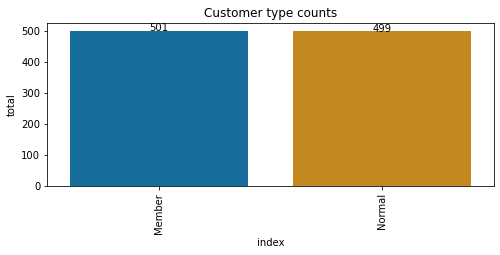

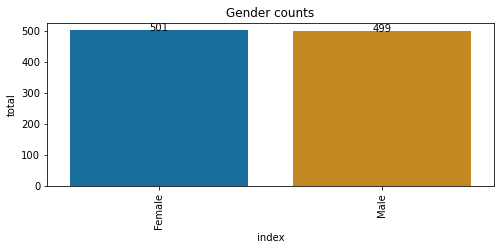

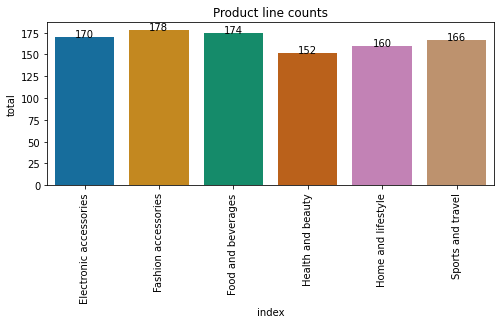

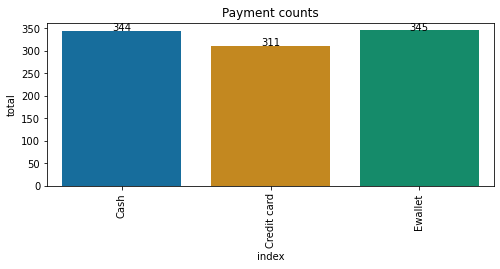

In [8]:
# Creates a subset of the categorical columns
categorical_features = ['Branch','City', 'Customer type','Gender','Product line', 'Payment']

# Loop to plot a barplot for each the count of each catergorical feature
for col in categorical_features:
   
    fig = plt.figure(figsize=(8,3))
    counts = sales[col].value_counts().sort_index().reset_index(name='total')
    
    sns.barplot(x='index', y='total', data=counts,
            palette='colorblind').set(title= col + ' counts')
    plt.xticks(rotation=90)
    
    for i in range(len(counts.index)):
        plt.text(i, counts.total[i], counts.total[i], ha = 'center')
    
    
plt.show()

  Branch  Average_Total_Spend
2      C               337.10
1      B               319.87
0      A               312.35
        City  Average_Total_Spend
1  Naypyitaw               337.10
0   Mandalay               319.87
2     Yangon               312.35
  Customer type  Average_Total_Spend
0        Member               327.79
1        Normal               318.12
   Gender  Average_Total_Spend
0  Female               335.10
1    Male               310.79
             Product line  Average_Total_Spend
4      Home and lifestyle               336.64
5       Sports and travel               332.07
3       Health and beauty               323.64
2      Food and beverages               322.67
0  Electronic accessories               319.63
1     Fashion accessories               305.09
       Payment  Average_Total_Spend
0         Cash               326.18
1  Credit card               324.01
2      Ewallet               318.82


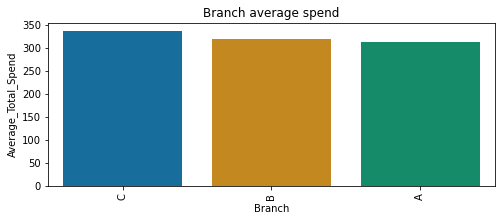

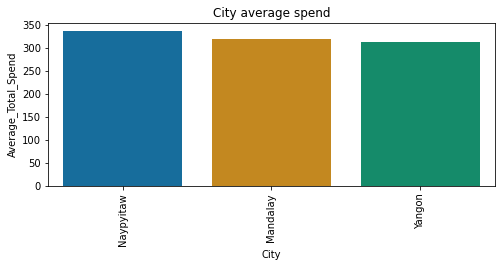

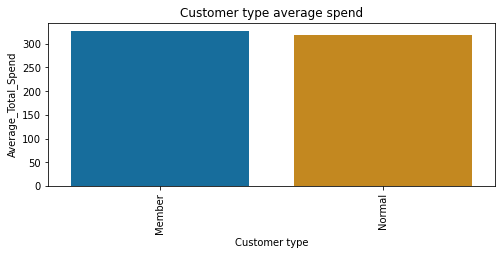

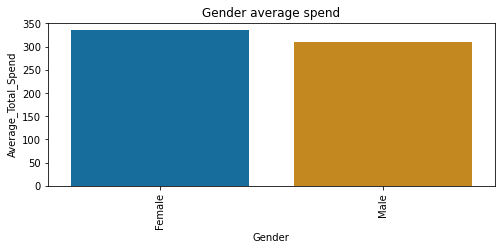

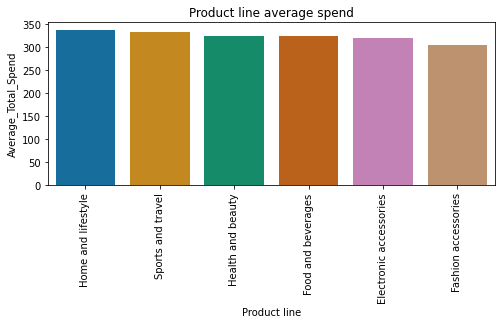

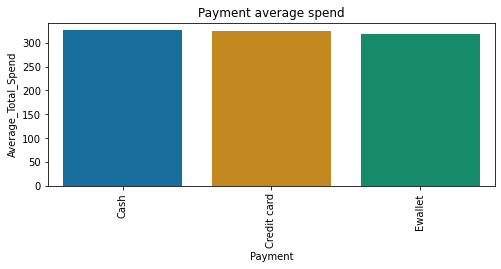

In [9]:
# Loop that plots a bar plot for the total spend for each categorical feature 
for col in categorical_features:
    TS = sales[[col, 'Total']]
    TS = TS.groupby([col], as_index=False).mean()
    TS.sort_values(by=['Total'], inplace=True, ascending=False)
    TS['Total'] = TS['Total'].apply(lambda x: round(x, 2))
    TS = TS.rename(columns={'Total': 'Average_Total_Spend'})
    print(TS)
    fig = plt.figure(figsize=(8,3))
    
    sns.barplot(x= col, y='Average_Total_Spend', data=TS,
            palette='colorblind').set(title= col + ' average spend')
    plt.xticks(rotation=90)
        
    
plt.show()

  Branch  Rating
2      C    7.07
0      A    7.03
1      B    6.82
        City  Rating
1  Naypyitaw    7.07
2     Yangon    7.03
0   Mandalay    6.82
  Customer type  Rating
1        Normal    7.01
0        Member    6.94
   Gender  Rating
1    Male    6.98
0  Female    6.96
             Product line  Rating
2      Food and beverages    7.11
1     Fashion accessories    7.03
3       Health and beauty    7.00
0  Electronic accessories    6.92
5       Sports and travel    6.92
4      Home and lifestyle    6.84
       Payment  Rating
1  Credit card    7.00
0         Cash    6.97
2      Ewallet    6.95


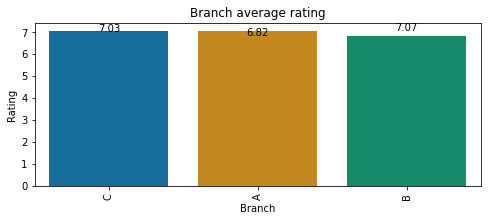

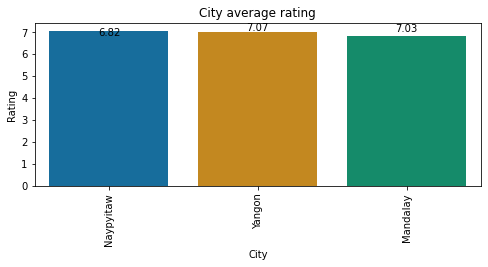

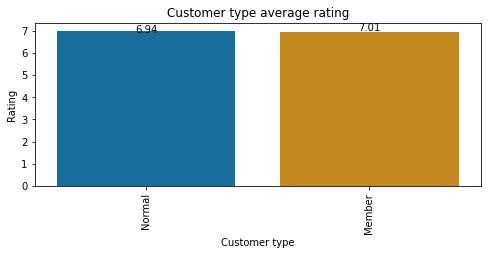

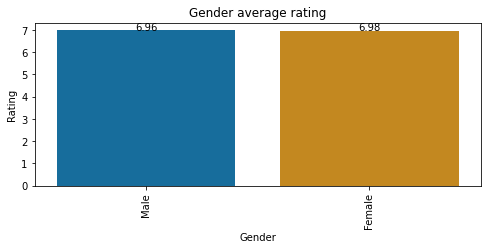

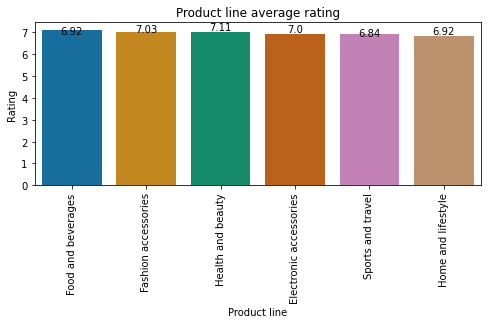

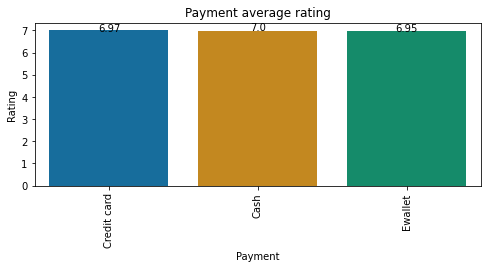

In [10]:
# Loop that plots a bar plot for the average customer rating for each categorical feature
for col in categorical_features:
    Rat = sales[[col, 'Rating']]
    Rat = Rat.groupby([col], as_index=False).mean()
    Rat.sort_values(by=['Rating'], inplace=True, ascending=False)
    Rat['Rating'] = Rat['Rating'].apply(lambda x: round(x, 2))
    print(Rat)
    fig = plt.figure(figsize=(8,3))
    
    sns.barplot(x= col, y='Rating', data=Rat,
            palette='colorblind').set(title= col + ' average rating')
    plt.xticks(rotation=90)
    
    for i in range(len(Rat['Rating'])):
        plt.text(i, Rat.Rating[i], Rat.Rating[i], ha = 'center')    
    
plt.show()

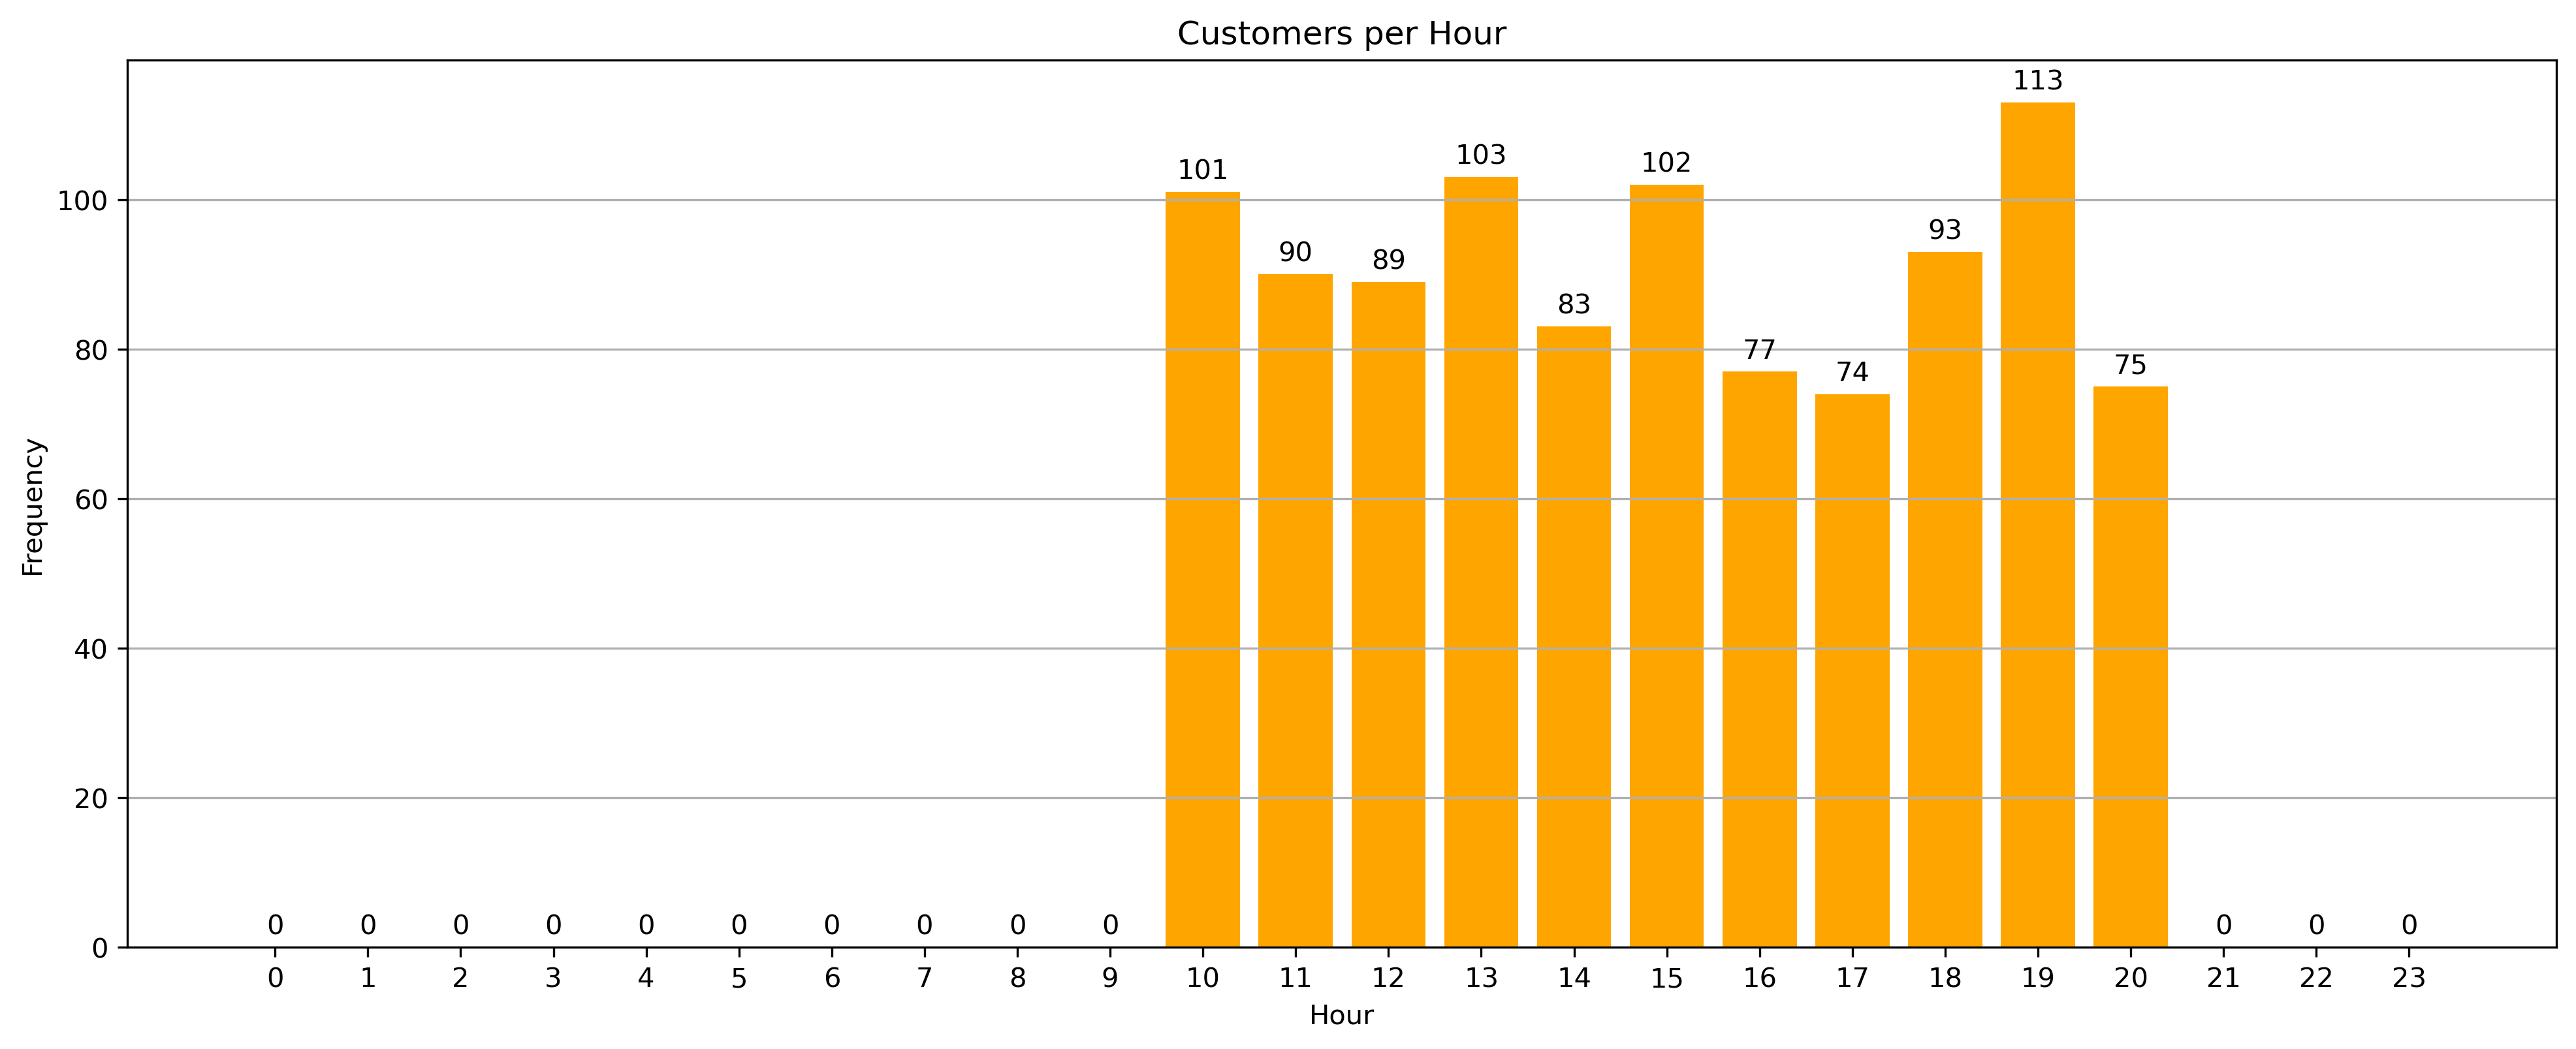

In [28]:
# A bar chart of the number of customers per each hour of the day
sales['Hour'] = pd.to_datetime(sales['Time'], format='%H:%M').dt.hour

# Counts the number of customers for each hour of the day
hour_freq = sales.groupby('Hour').size()

# Creates an index from 0 to 24
all_hours = pd.RangeIndex(start=0, stop=24)

# Matches hourly count to new index, any hours where no customers are counted, a 0 is assigned
hour_freq = hour_freq.reindex(all_hours, fill_value=0)

# Plots a bar plot of the customer count per hour
plt.figure(figsize=(16,6), dpi=300)
bars = plt.bar(hour_freq.index, hour_freq, color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
    
    
plt.title('Customers per Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()


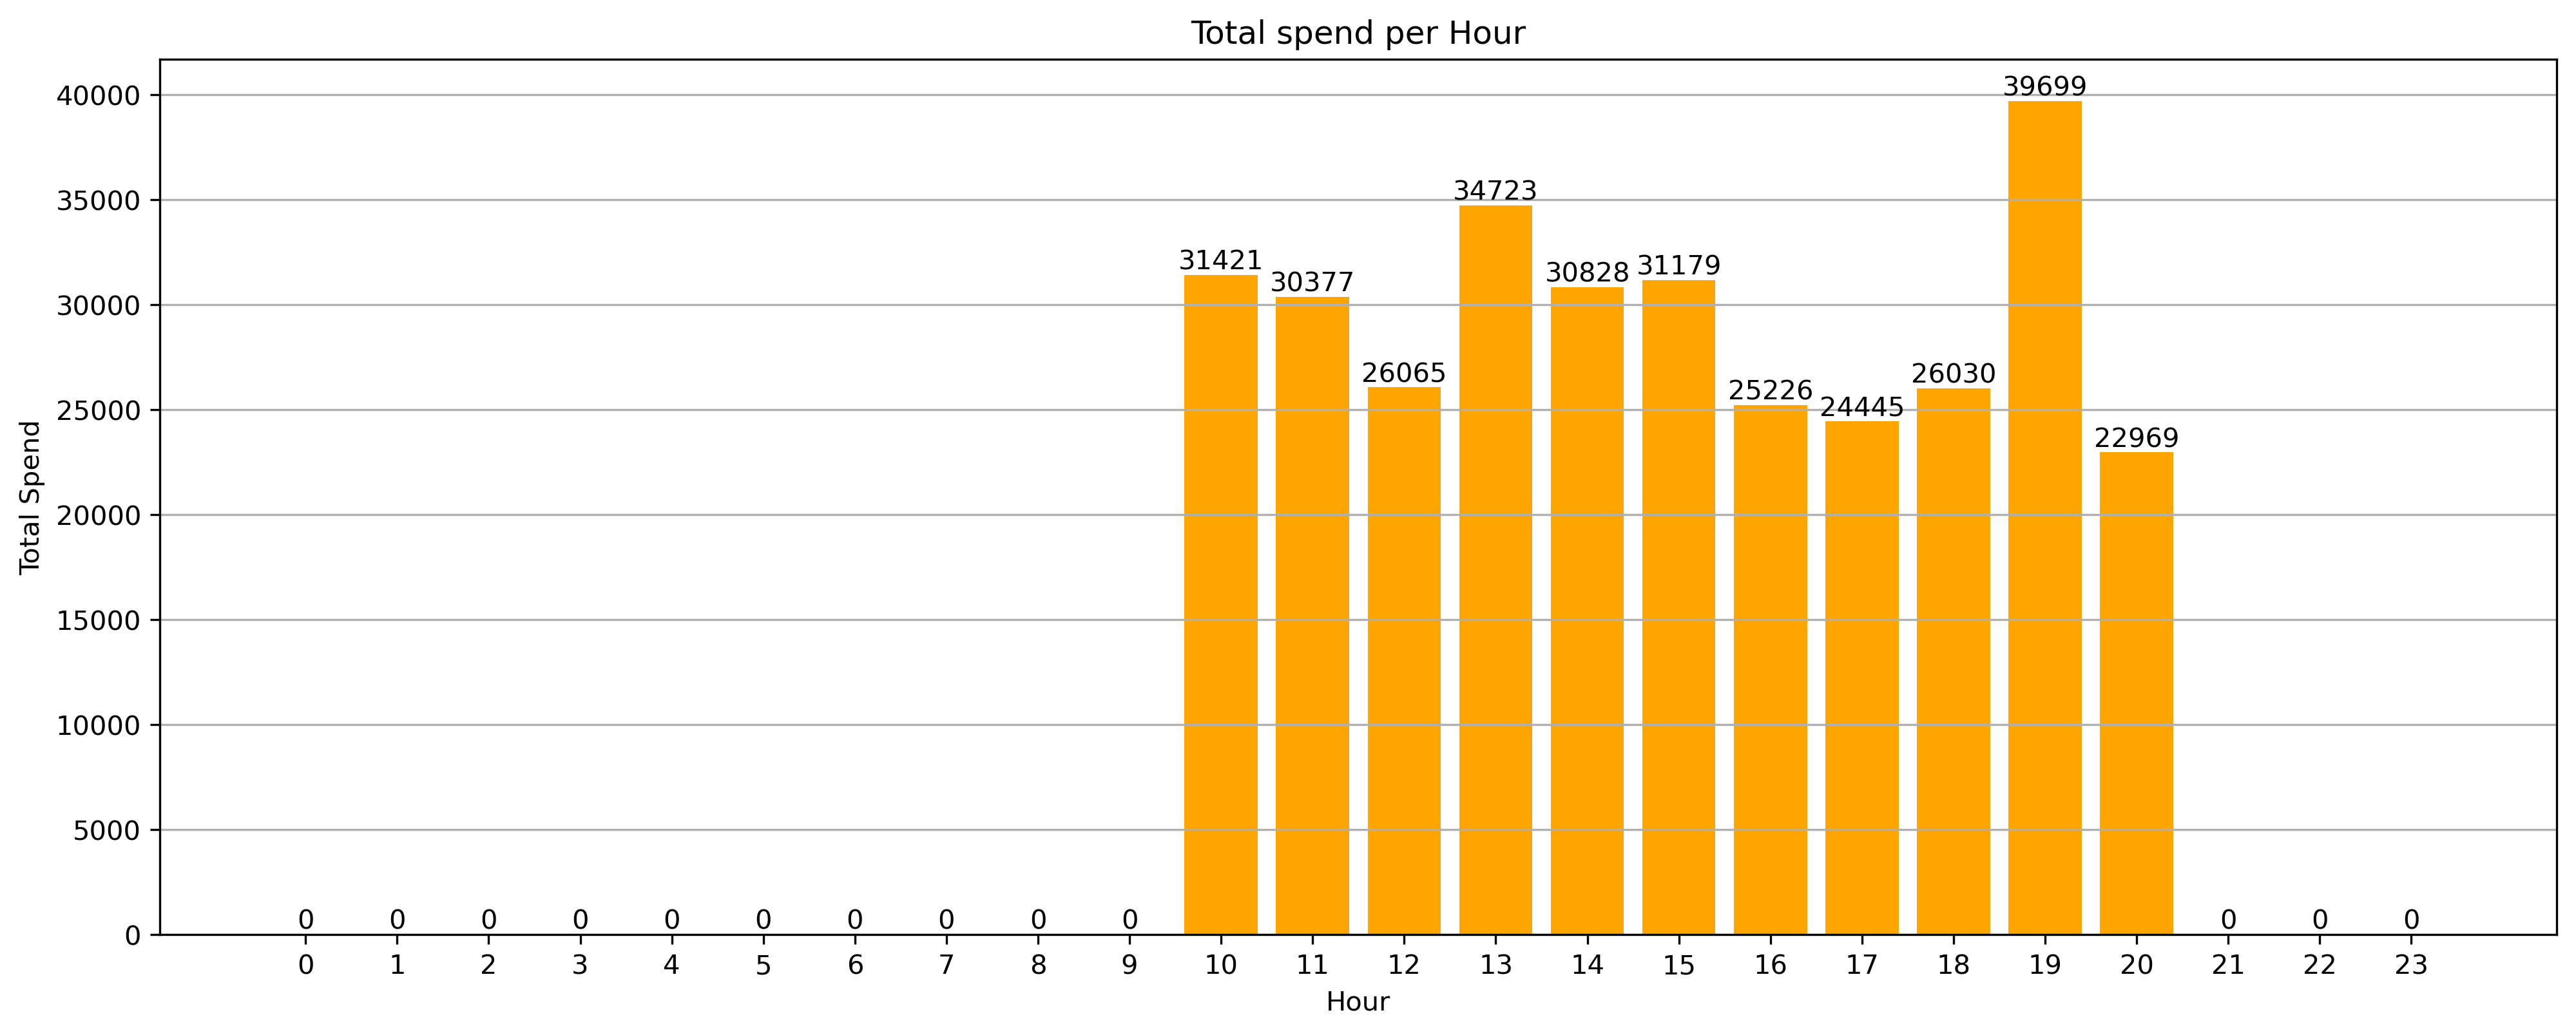

In [12]:
# A bar chart of the total spend per each hour of the day
sales['Hour'] = pd.to_datetime(sales['Time'], format='%H:%M').dt.hour

# Counts the total spend for each hour of the day
hour_spend = sales[['Hour', 'Total']]
hour_spend = hour_spend.groupby('Hour').sum()
hour_spend['Total'] = hour_spend['Total'].apply(lambda x: round(x, 2))

# Creates an index from 0 to 24
all_hours = pd.RangeIndex(start=0, stop=24)

# Matches hourly total spend to new index, any hours nothing is spent, a 0 is assigned
hour_spend = hour_spend.reindex(all_hours, fill_value=0)

# Plots a bar plot of the total spend per hour
plt.figure(figsize=(16,6), dpi=300)
bars = plt.bar(hour_spend.index, hour_spend['Total'], color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
    
    
plt.title('Total spend per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Spend')
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()

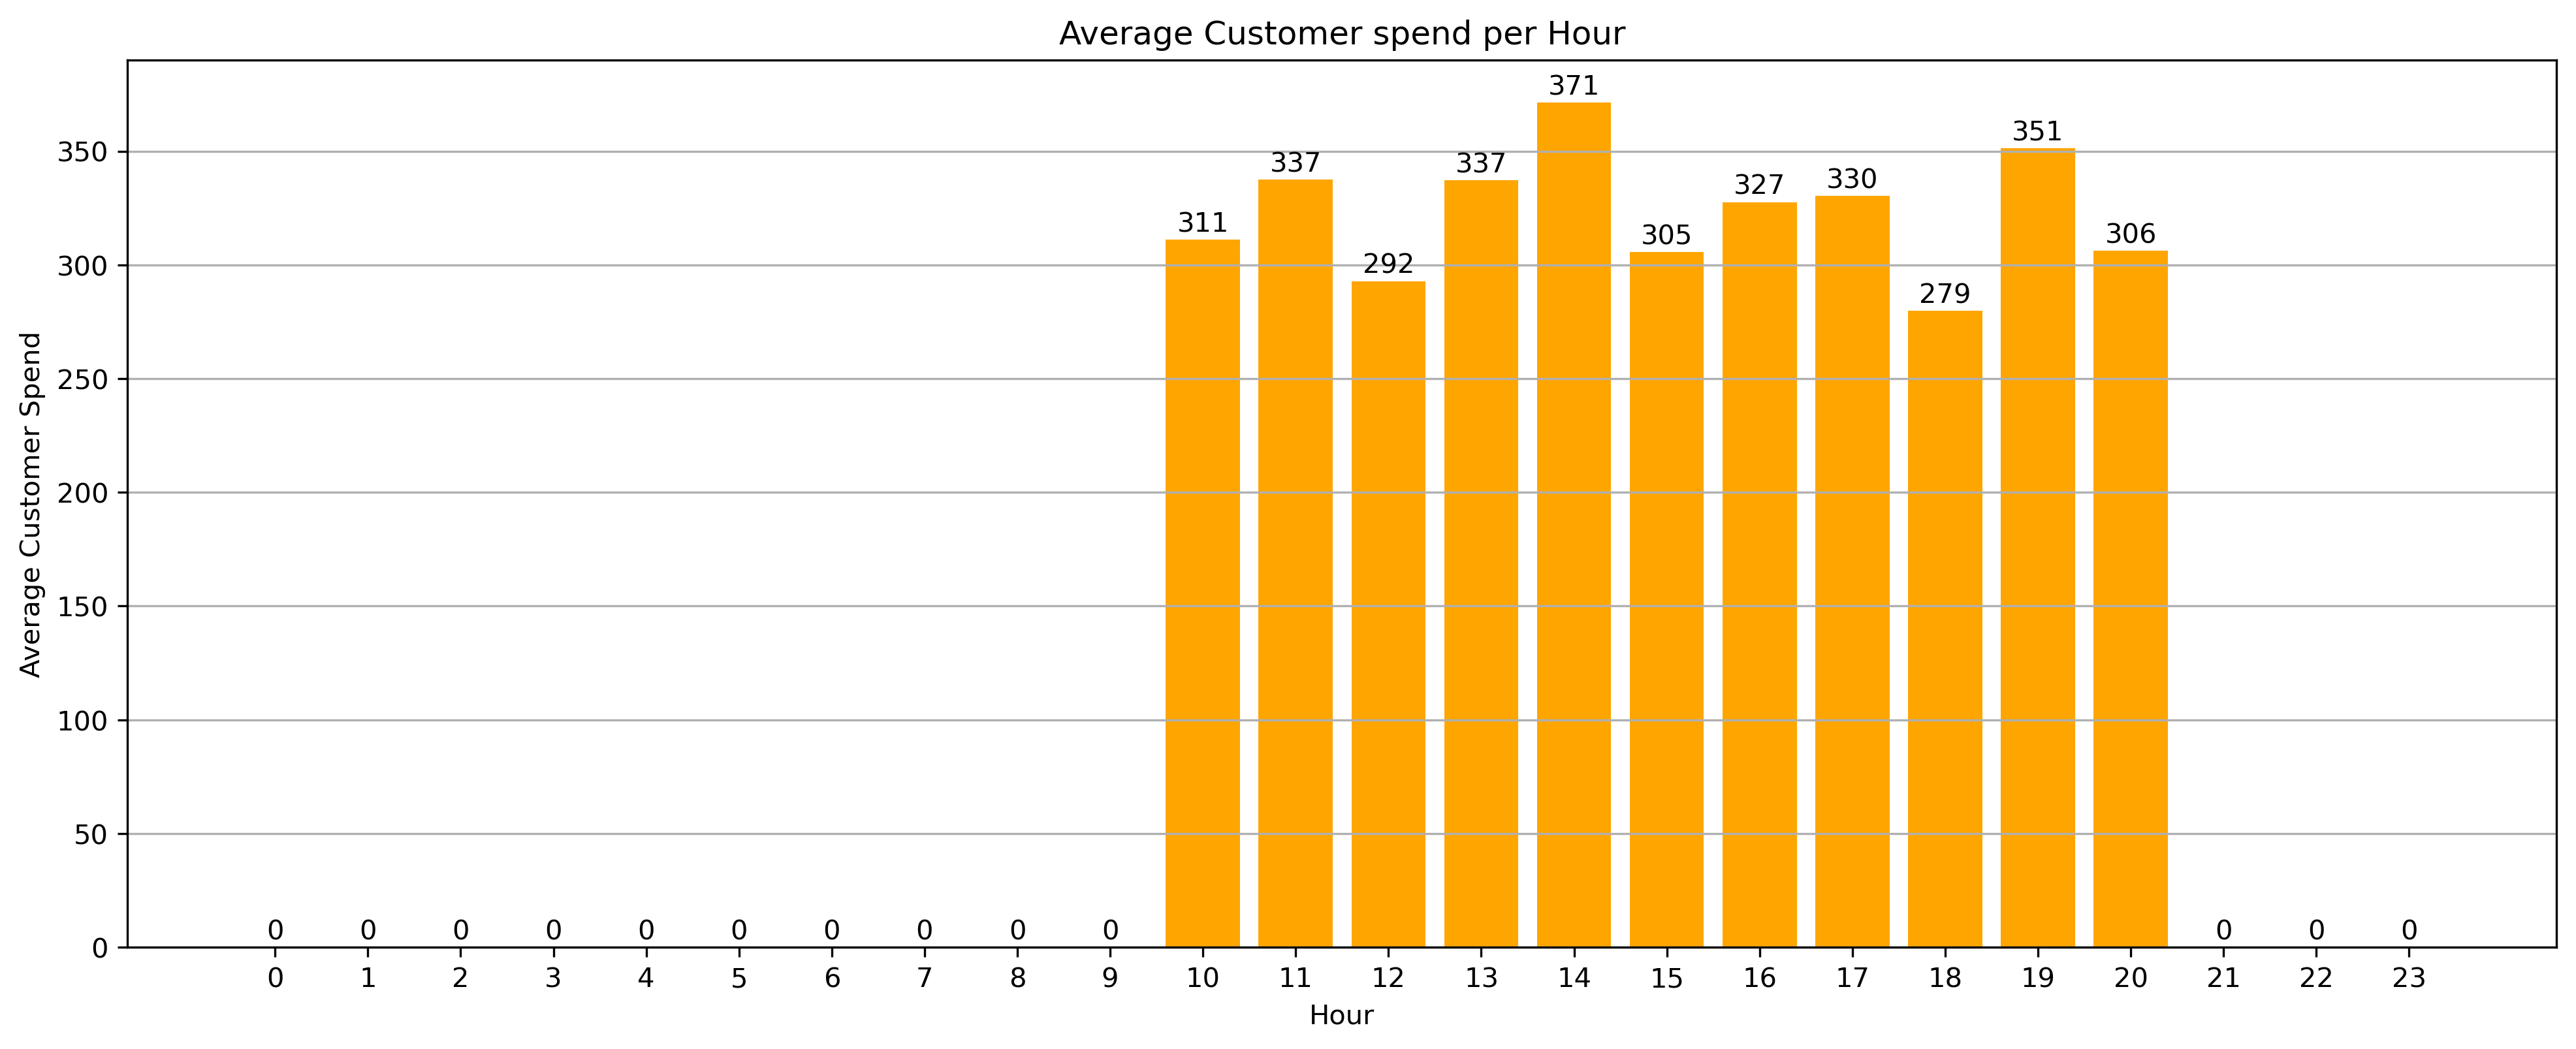

In [13]:
# Counts the average customer spend for each hour of the day
sales['Hour'] = pd.to_datetime(sales['Time'], format='%H:%M').dt.hour
hour_spend = sales[['Hour', 'Total']]
hour_spend = hour_spend.groupby('Hour').mean()
hour_spend['Total'] = hour_spend['Total'].apply(lambda x: round(x, 2))

# Creates an index from 0 to 24
all_hours = pd.RangeIndex(start=0, stop=24)
hour_spend = hour_spend.reindex(all_hours, fill_value=0)

# Matches hourly average spend to new index, any hours nothing is spent, a 0 is assigned
plt.figure(figsize=(16,6), dpi=300)
bars = plt.bar(hour_spend.index, hour_spend['Total'], color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
    
# Plots a bar plot of the average spend per hour    
plt.title('Average Customer spend per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Customer Spend')
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()

# Predicting Satisfaction Ratings

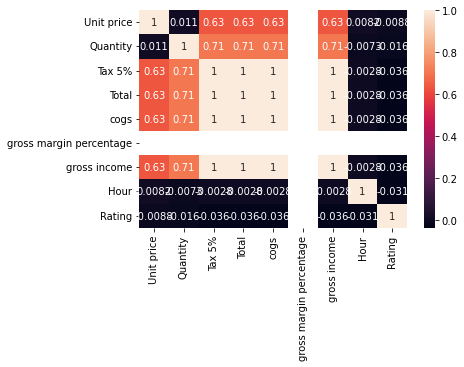

In [14]:
# Generate a correlation matrix for the various numerical columns. A heat map is applied to help visulaise relationship.
corrMatrix = sales[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Hour', 'Rating']].corr() 
sns.heatmap(corrMatrix, annot=True) 
plt.show()  

In [32]:
# Subset is created to reduce less relevent columns
sales_cat = sales[['Unit price', 'Quantity', 'Total', 'gross income', 'Hour', 'City', 'Customer type', 'Gender', 
                   'Product line','Payment', 'Rating']]

# Function to convert categorcial feature columns into  distinct numerical values
def Cat_to_Num(df):

# Creates an array of the columns in the dataframe
    columns = df.columns.values
    for column in columns:
        vals = {}
        def con_to_int(val):
            return vals[val]
        
# IF condition for if column datatype is not an integer or float
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
        
# Creates a set of the unique values within the column       
            elements = set(df[column].values.tolist())
            x = 0
# Loop that assigns a distinct integer in place of each unique value starting from 0        
            for e in elements:
                if e not in vals:
                    vals[e] = x
                    x+=1

            df[column] = list(map(con_to_int, df[column]))

    return df

# Function is applied to subset of sales data to transform all categorical data to integers
sales_rat = Cat_to_Num(sales_cat)
print(sales_rat.head())


# Creates X and y subsets, separating customer ratings from dataframe
X, y = sales_rat[['Unit price', 'Quantity', 'Total', 'gross income', 'Hour', 'City', 'Customer type', 'Gender', 
                  'Product line','Payment']].values, sales_rat['Rating'].values

print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

   Unit price  Quantity     Total  gross income  Hour  City  Customer type  \
0       74.69         7  548.9715       26.1415    13     1              0   
1       15.28         5   80.2200        3.8200    10     2              1   
2       46.33         7  340.5255       16.2155    13     1              1   
3       58.22         8  489.0480       23.2880    20     1              0   
4       86.31         7  634.3785       30.2085    10     1              1   

   Gender  Product line  Payment  Rating  
0       0             4        1     9.1  
1       0             1        2     9.6  
2       1             2        0     7.4  
3       1             4        1     8.4  
4       1             3        1     5.3  
Features:
[[ 74.69     7.     548.9715  26.1415  13.       1.       0.       0.
    4.       1.    ]
 [ 15.28     5.      80.22     3.82    10.       2.       1.       0.
    1.       2.    ]
 [ 46.33     7.     340.5255  16.2155  13.       1.       1.       1.
    2.     

C:\Users\jakee\AppData\Local\Temp/ipykernel_24460/463573999.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = list(map(con_to_int, df[column]))


In [16]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 700 rows
Test Set: 300 rows


In [17]:
# Create labels for the various regression models

LR = LinearRegression()
L = Lasso()
RF = RandomForestRegressor()
DT = DecisionTreeRegressor()
GB = GradientBoostingRegressor()

Model = [LR, L, RF, DT, GB]
Name =  ["Linear Regression", "Lasso", "Random Forest", "Decesion Tree", "Gradient Boosting"]

LinearRegression()
MSE: 3.189832706722284
RMSE: 1.786010276208478
R2: -0.027995433058198183





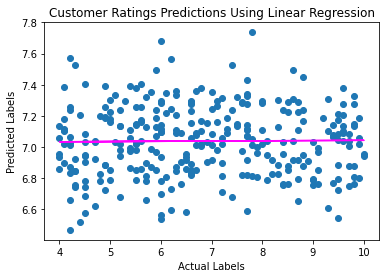

Lasso()
MSE: 3.144036442504125
RMSE: 1.7731430970184345
R2: -0.013236555463087774





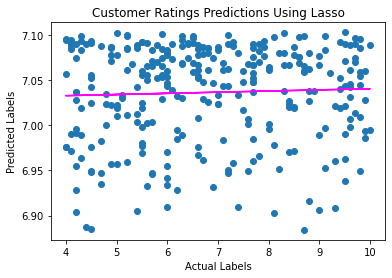

RandomForestRegressor()
MSE: 3.3745830633333327
RMSE: 1.8370038277949594
R2: -0.08753539653395892





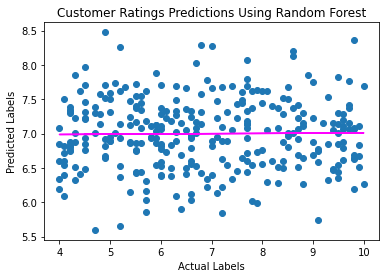

DecisionTreeRegressor()
MSE: 6.159066666666667
RMSE: 2.4817466967171864
R2: -0.9848979515105183





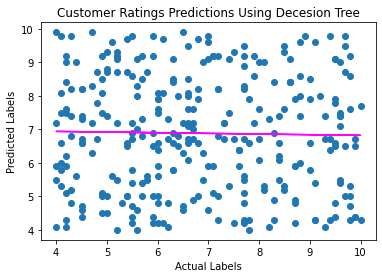

GradientBoostingRegressor()
MSE: 3.504352681815642
RMSE: 1.8719916350816428
R2: -0.12935657883871898





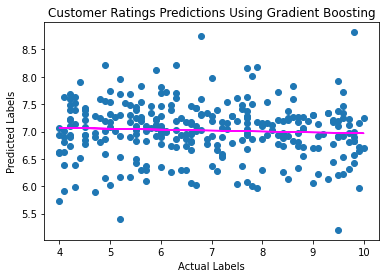

In [19]:
r2s = []
mses = []

# Loop that trains each regression model and  generates R2/MSE values
for i, j in zip(Model, Name):
    print(i) 
    model = i.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, pred)
    print("R2:", r2)
    
    print("\n\n")
    r2s += [r2]
    mses += [mse]
    
 # Scatter plot of actual and predcited rating values is created   
    plt.scatter(y_test, pred)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title('Customer Ratings Predictions Using ' + j)
   
    z = np.polyfit(y_test, pred, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.show()

# Time Series

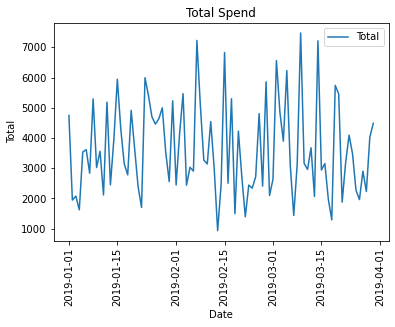

In [20]:
# Plots a line graph of total spend for each day
sales['Date'] = pd.to_datetime(sales['Date'])
sales_date = sales[['Date', 'Total']]
sales_date= sales_date.groupby(['Date']).agg('sum').reset_index()

sns.lineplot(x = 'Date', y = 'Total', data=sales_date, ci=None, label = 'Total Spend')
plt.xticks(rotation=90)
plt.title('Total Spend')
plt.legend()
plt.show()

         

In [21]:
# Daily total spend is calculated for each branch

sales_branch = sales[['Date', 'City', 'Total']]

sales_A = sales_branch[sales_branch['City'] == 'Yangon']
sales_B = sales_branch[sales_branch['City'] == 'Mandalay']
sales_C = sales_branch[sales_branch['City'] == 'Naypyitaw']

sales_A = sales_A.groupby(['Date']).agg('sum').reset_index()
sales_B = sales_B.groupby(['Date']).agg('sum').reset_index()
sales_C = sales_C.groupby(['Date']).agg('sum').reset_index()



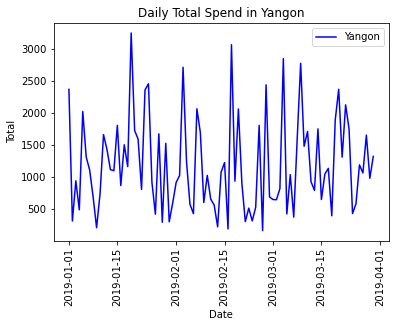

In [23]:
# Line graph to show daily spend in branch A
sns.lineplot(x = 'Date', y = 'Total', data=sales_A, ci=None, color='b', label='Yangon')

plt.xticks(rotation=90)
plt.title('Daily Total Spend in Yangon')
plt.legend()
plt.show()



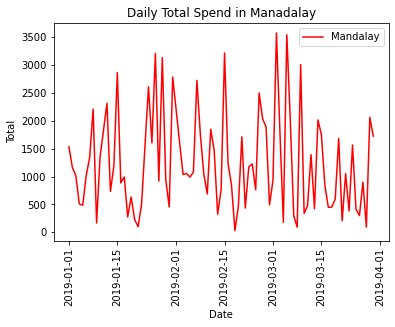

In [24]:
# Line graph to show daily spend in branch A

sns.lineplot(x = 'Date', y = 'Total', data=sales_B, ci=None, color='r', label='Mandalay')

plt.xticks(rotation=90)
plt.title('Daily Total Spend in Manadalay')
plt.legend()
plt.show()


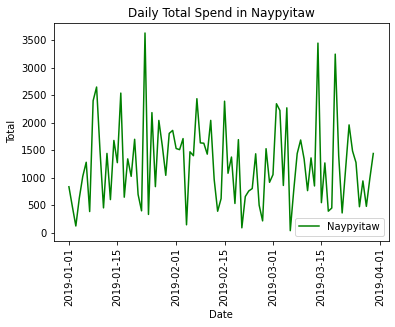

In [33]:
# Line graph to show daily spend in branch A

sns.lineplot(x = 'Date', y = 'Total', data=sales_C, ci=None, color='g', label='Naypyitaw')

plt.xticks(rotation=90)
plt.title('Daily Total Spend in Naypyitaw')
plt.legend()
plt.show()